<a href="https://colab.research.google.com/github/OmniaOsama03/Artificial_Intelligence_Programming_Labs/blob/main/Lab%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI Lab -5
#Name: Omnia Osama Ahmed



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import curve_fit

In [ ]:
df = pd.read_csv('CO2.csv')
df.head()

,Year,CO2
0,1949,14656
1,1950,98928
2,1951,190528
3,1952,282128
4,1953,388384


#Task 1 - Plot the Dataset

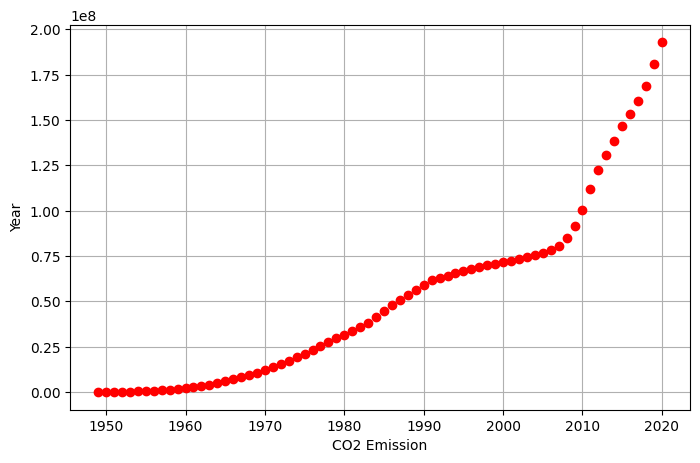

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["CO2"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Year')
plt.xlabel('CO2 Emission')
plt.grid(True)


#Task 2 -  Choose appropriate Function


beta_1 = 155.727048, beta_2 = 0.992244


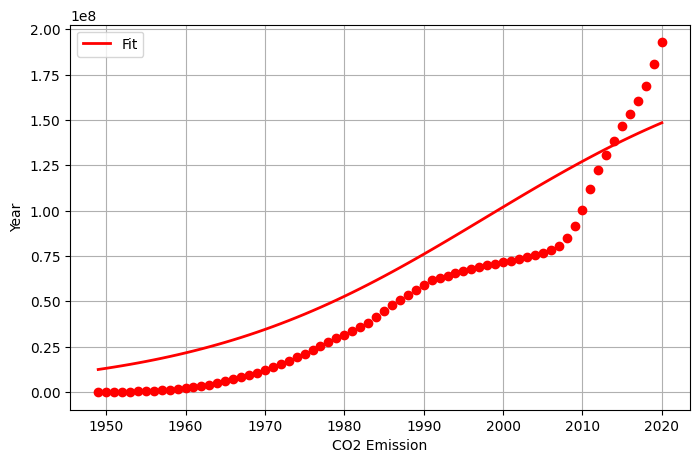

MSE: 0.003959892866628785


In [ ]:
# Plot the original data
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["CO2"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Year')
plt.xlabel('CO2 Emission')
plt.grid(True)

# Define the sigmoidal function
def sigmoid(x, beta_1, beta_2):
    y = 1 / (1 + np.exp(-beta_1*(x-beta_2)))
    return y

# Normalize data for better fitting
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

# Fit the sigmoidal model to the data
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

# Plot the resulting regression model
x = np.linspace(1960, 2010, 72)
x = x/max(x)
y = sigmoid(x, *popt)
plt.plot(x_data, y * max(y_data), 'r-', linewidth=2, label='Fit')  # Fit in red
plt.legend(loc='best')

# Show the plot with the fit
plt.show()

# Evaluate the model
y_pred = sigmoid(xdata, *popt)
# Calculate MSE
mse = mean_squared_error(ydata, y_pred)
print("MSE:", mse)


a = 0.000000, b = 94.962722


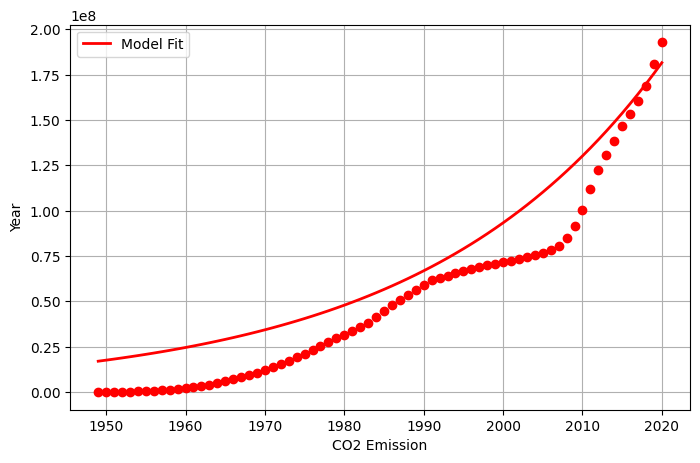

Mean Squared Error (MSE): 0.0020387576937632526


In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["CO2"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Year')
plt.xlabel('CO2 Emission')
plt.grid(True)

# Define the exponential function
def exponential(x, a, b):
    return a * np.exp(b * x)

# Normalize data for better fitting
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

# Fit the exponential model to the data
popt, pcov = curve_fit(exponential, xdata, ydata, maxfev=10000)
print("a = %f, b = %f" % (popt[0], popt[1]))

# Plot the resulting regression model
x = np.linspace(1960, 2010, 72)
x = x/max(x)
y = exponential(x, *popt)
plt.plot(x_data, y * max(y_data), 'r-', linewidth=2, label='Model Fit')  # Fit in red
plt.legend(loc='best')
plt.show()

# Evaluate the model
y_pred = exponential(xdata, *popt)
# Calculate MSE
mse = mean_squared_error(ydata, y_pred)
print("Mean Squared Error (MSE):", mse)


#Task 3 - Deploy In Gradio

In [ ]:
!pip install gradio
import gradio as gr

# Define the function to predict CO2 emissions
def gdp_predictor(year): #When user gives year, model gives this.
    # Normalize the year input for prediction
    year_norm = year / max(x_data)
    # Predict CO2 emission using the fitted model
    co2_emission = exponential(year_norm, *popt) * max(y_data)
    return f"{co2_emission:.2f} Co2 Metric Tons"

# Create the Gradio interface
input_year = gr.Number(label = "Enter the year: ");
output_co2 = gr.Textbox(label = "The predicted co2 emission: ");
interface = gr.Interface(
    fn = gdp_predictor,
    inputs = input_year,
    outputs = output_co2,
    title = "\t\t\t\tCarbon Dioxide Emissions (CO2) Prediction \n Non-linear Regression Model ",
    description = "Enter a year and we'll predict the CO2 Emissions using Exponential",
)

# Launch the interface
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://082c2030f53ecfdcd9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
